In [1]:
import Discretization
from Discretization import RegSensOut

import numpy as np
from scipy.special import softmax
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### Functions

In [2]:
def gen_X(N, n_ftr=3):
    X = np.random.normal(0, 1, (N, n_ftr))
    return X

def gen_S(X, thr=0):
    N = len(X)
    S = np.zeros(N)
    S[X[:, 0] < thr] = -1
    S[X[:, 0] >= thr] = 1
    return S
    
def gen_y(X):
    N, n_ftr = X.shape
    return np.dot(X, np.ones(n_ftr) * 3) + np.random.normal(0, 1, N)  

def plot_pred_dist(model, X, S, data = 'test (out of sample)', fair=True):   
    
    y_pred = model.predict(X)

    plt.figure('1')
    plt.hist(y_pred[S == -1], label='s=-1', density=True, stacked=True, bins=20)
    plt.hist(y_pred[S == 1], label='s=+1', alpha=0.3, density=True, stacked=True, bins=20)
    
    if fair:
        plt.title('Distribution of prediction on '+ str(data) +' data with fairness adjustment')
    else:
        plt.title('Distribution of prediction on '+ str(data) +' data without fairness adjustment')
        
    plt.legend()

### Data generation.

In [3]:
N_train = 500
X_train = gen_X(N_train)
S_train = gen_S(X_train)
y_train = gen_y(X_train)

In [4]:
N_unlab = 1000
X_unlab = gen_X(N_unlab)

In [5]:
N_test = 1000
X_test = gen_X(N_test)
S_test = gen_S(X_test)

### Training regression model on labeled data.

In [6]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

### Training sensitive attribute classifier on labeled data.

In [7]:
clf = LogisticRegression()
clf.fit(X_train,S_train)

LogisticRegression()

### Training fairness-adjusted regression model on unlabeled data.

In [8]:
fair_reg = RegSensOut(reg, clf)
fair_reg.fit(X_unlab)

### Plots

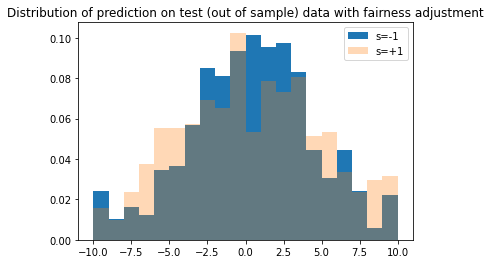

In [9]:
plot_pred_dist(fair_reg, X_test, S_test, data = 'test (out of sample)', fair=True)

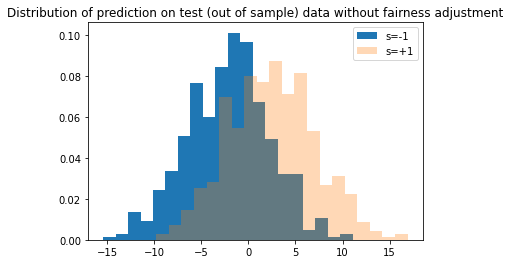

In [10]:
plot_pred_dist(reg, X_test, S_test, data = 'test (out of sample)', fair=False)